In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


## Download Data

In [ ]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Books_10.json.gz

--2020-02-19 14:34:07--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Books_10.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1936272238 (1.8G) [application/x-gzip]
Saving to: ‘reviews_Books_10.json.gz’

reviews_Books_10.js 100%[===================>]   1.80G  4.06MB/s    in 10m 4s  

2020-02-19 14:44:12 (3.06 MB/s) - ‘reviews_Books_10.json.gz’ saved [1936272238/1936272238]



### Extract Data

In [ ]:
# extract json file
!gunzip reviews_Books_10.json.gz

## Process Data
The file is a huge json file, size around 5.5 GB

contains **5M** review

So, the file will be splited and saved a pickle file

In [ ]:
# read json file
infile = open('reviews_Books_10.json', 'r')

In [ ]:
# base path for saved file
path = 'dataNew/'

In [ ]:
!mkdir '$path'

mkdir: cannot create directory ‘dataNew/’: File exists


#### Export function
This function convert JSON file to pickle as a data frame

This dataset is highly imbalanced datasets. So to balance this dataset. First, the lowest number of data will find out for a particular class among the data frame. This value will be multiplied by the ratio. For example,
```
number * ratio => number

2000 * 1.0 => 2000

2000 * 1.5 => 3000
```
In this way, the sliced number will be calculated. Only from the lowest class, all the data will be collected and from the rest of the classes, the only calculated sliced size of data will be sliced and saved as a pickle.

In [ ]:
from sklearn.utils import shuffle

def export(review, overall, summary, i, ratio=1.0):
  """
    This function take 3 columns list and index number and also ration
    here, i is used to to save file as unique name
    and ratio is how much data is take, default is 1.0
  """
  # create dict
  di = {
      "Review": review,
      "Overall":overall,
      "Summary": summary
  }
  # Create Dataframe
  df = pd.DataFrame(di)

  # get lowest valus contains by a single class
  v = list(df.Overall.value_counts(ascending=True))[0]
  # multiply with ratio
  v *= ratio 

  on = df[df.Overall==1.0][:v]
  tw = df[df.Overall==2.0][:v]
  th = df[df.Overall==3.0][:v]
  fo = df[df.Overall==4.0][:v]
  fi = df[df.Overall==5.0][:v]

  temp = pd.concat([on, tw, th, fo, fi])
  #shuffle data
  temp = shuffle(temp)

  #reindex
  temp.reset_index(drop=True, inplace=False)
  print("Saved file on: ", temp.shape)
  # Save as pickle
  temp.to_pickle(path+str(i)+".pickle")

In [ ]:
import re
# remove html tags data
def preprocess_text(text):
    # Removing html tags
    TAG_RE = re.compile(r'<[^>]+>')
    sentence = TAG_RE.sub('', text)
    return sentence

In [ ]:
import json
import pandas as pd

review = []
overall = []
summary = []

for i, row in enumerate(infile):
  data = json.loads(row)
  text = preprocess_text(data['reviewText'])
  review.append(text)
  overall.append(data['overall'])
  summary.append(data['summary'])

  #split after 50000 entry
  # clean previous data
  if len(review) > 100000:
    print("Batch:", i)
    export(review, overall, summary, "Data "+str(i))
    review.clear()
    overall.clear()
    summary.clear()

Batch: 100000
Saved file on:  (23515, 3)
Batch: 200001
Saved file on:  (20290, 3)
Batch: 300002
Saved file on:  (19000, 3)
Batch: 400003
Saved file on:  (16125, 3)
Batch: 500004
Saved file on:  (17595, 3)
Batch: 600005
Saved file on:  (22660, 3)
Batch: 700006
Saved file on:  (15700, 3)
Batch: 800007
Saved file on:  (19620, 3)
Batch: 900008
Saved file on:  (16930, 3)
Batch: 1000009
Saved file on:  (15845, 3)
Batch: 1100010
Saved file on:  (13405, 3)
Batch: 1200011
Saved file on:  (16475, 3)
Batch: 1300012
Saved file on:  (18885, 3)
Batch: 1400013
Saved file on:  (12690, 3)
Batch: 1500014
Saved file on:  (14130, 3)
Batch: 1600015
Saved file on:  (16065, 3)
Batch: 1700016
Saved file on:  (17965, 3)
Batch: 1800017
Saved file on:  (10540, 3)
Batch: 1900018
Saved file on:  (10700, 3)
Batch: 2000019
Saved file on:  (13160, 3)
Batch: 2100020
Saved file on:  (14845, 3)
Batch: 2200021
Saved file on:  (16575, 3)
Batch: 2300022
Saved file on:  (13045, 3)
Batch: 2400023
Saved file on:  (11990, 3)
B

In [ ]:
len(review)

1863

### Create a test file for testing

In [ ]:
di = {
      "Review": review,
      "Overall":overall,
      "Summary": summary
}
# Create Dataframe
df = pd.DataFrame(di)

df.to_pickle("Test.pickle")

Saved file on:  (30, 3)


### Clean memory

In [ ]:
del review
del overall
del summary
del infile

### Check final data size

In [ ]:
import glob

count = 0

for i, d in enumerate(glob.glob(path+'Data *.pickle')):
  df = pd.read_pickle(d)
  count += df.shape[0]
 
print("Final Size: ", count)

Final Size:  580640


## Test Sample

In [ ]:
test = pd.read_pickle(path+"Data 100000.pickle")

In [ ]:
test.head()

,index,Review,Overall,Summary
0,0,many convoluted story lines that just don't co...,1.0,"waste of money, this story has been told before"
1,1,I loved it. I would recommend that before rea...,5.0,Great Start
2,2,I think it would be hard for any book to live ...,4.0,Well written enjoyable read...
3,3,"Overall, I feel like I am reading an angel ver...",1.0,Angel Twilight
4,4,I absolutely loved the first half of 13 to Lif...,3.0,Good story...lost me about midway.


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23515 entries, 12 to 10398
Data columns (total 3 columns):
Review     23515 non-null object
Overall    23515 non-null float64
Summary    23515 non-null object
dtypes: float64(1), object(2)
memory usage: 734.8+ KB


In [ ]:
test.Overall.value_counts()

5.0    4703
4.0    4703
3.0    4703
2.0    4703
1.0    4703
Name: Overall, dtype: int64

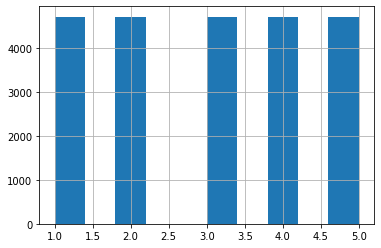

In [ ]:
test.Overall.hist()

In [ ]:
del test

## Tokenizer
The file are splited into several parts, so all file will be open and create tokenizer for all the files

In [ ]:
from keras.preprocessing.text import Tokenizer
from string import punctuation

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 1000

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)

Using TensorFlow backend.


In [ ]:
import glob
import pandas as pd

for i, d in enumerate(glob.glob(path+'Data *.pickle')):
  df = pd.read_pickle(d)
  li = list(df.Review.values)
  tokenizer.fit_on_texts(li)

print("Totla number of unique words: ", len(tokenizer.word_index))

Totla number of unique words:  384290


In [ ]:
import pickle
# Save Tokenizer
def save_token(tokenizer):
  with open(path+'token.pickle', 'wb') as f:
      pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)


def load_token():
  with open(path+'token.pickle', 'rb') as handle:
    token = pickle.load(handle)
  return token

Save tokenizer for further uses

In [ ]:
save_token(tokenizer)

## Train with a single pickle file

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 150

def padded(list_of_text):
  X = tokenizer.texts_to_sequences(list_of_text)
  X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
  return X

### Test with first pickle

In [ ]:
li = glob.glob(path+'Data *.pickle')
fname = li[0]
fname

'dataNew/Data 700006.pickle'

### Analysis first file

In [ ]:
df = pd.read_pickle(fname)
df.head()

,Review,Overall,Summary
38,I had high expectations for this novel. First...,1.0,Extremely Disappointing
77,There are certain expectations of romance fict...,1.0,"no conflict, no drama, no grey moment = no story"
86,Checked out the first 2 books in the series fr...,1.0,Third time broke the charm
87,I've always been a huge Nora Roberts fan but l...,1.0,BORING
128,I'm very disappointed in the publisher's choic...,1.0,Not on Kindle - Won't buy it


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15700 entries, 38 to 6486
Data columns (total 3 columns):
Review     15700 non-null object
Overall    15700 non-null float64
Summary    15700 non-null object
dtypes: float64(1), object(2)
memory usage: 490.6+ KB


In [ ]:
df.Overall.value_counts()

5.0    3140
4.0    3140
3.0    3140
2.0    3140
1.0    3140
Name: Overall, dtype: int64

### Remove short review

In [ ]:
print("Before removing short review")
print(len(min(df.Review)))
print(len(max(df.Review)))


con = df.Review.apply(lambda x: len(x.split()) > 10)
df = df[con]

print("\nAfter remove short review")
print(len(min(df.Review)))
print(len(max(df.Review)))

491
2109


### Encode Review and label

In [ ]:
X = padded(df.Review.values)
print("Ecoded Review Shape: ", X.shape)

Ecoded Review Shape:  (15687, 150)


In [ ]:
from sklearn import preprocessing
import keras

label = df.Overall.values

le = preprocessing.LabelEncoder()
le.fit(label)

def encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def decode(le, one_hot):
    dec = np.argmax(one_hot, axis=1)
    return le.inverse_transform(dec)

#Encode label
y_enc = encode(le, label)

In [ ]:
print("Actual review:", review[20])
print("Review len: ", len(review[20].split()))
print("Encoded label:", y_enc[20])
print("Ecoded Review: ", X[20])

Actual review: Warning - Contains SpoilersI have been a faithful reader of this series since it began. I loved the series, notice past tense. Up until this book, I really did love the books. After Bullet, though, I am done. I will not read another one and I truly would love if I could undo reading this one but I can't and it taints every one of the previous books. The reason I loved the books so was that I felt the connection between Anita and Jean Claude, my two favorite characters. Now, I feel betrayed by Jean Claude having sex with another woman, having sex with another man. I felt the love and romance between Anita and Jean Claude. Now all I feel is disgust. They both deserve each other.
Review len:  129
Encoded label: [1. 0. 0. 0. 0.]
Ecoded Review:  [    6    54   317  1412    14    10   107    68     9     7   135    39
    48   404    79  2536  3077     2    13   355     4   528   367   822
    39   781   867     2   260     6  1453    46    54    80     4  1113
   564   145   

### Prepare Datasets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.05)

print("Train input shape: ",X_train.shape)
print("Test input shape: ",X_test.shape)

Train input shape:  (14902, 150)
Test input shape:  (785, 150)


### Test with simple model

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential

EMBEDDING_DIM = 100

model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, EMBEDDING_DIM, input_shape=(X_train.shape[1], )))
model.add(LSTM(units=128, activation='tanh', recurrent_dropout=0.2, return_sequences=True),)
model.add(LSTM(units=256, activation='tanh', recurrent_dropout=0.2),)
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 150, 100)          38429100  
_________________________________________________________________
lstm_6 (LSTM)                (None, 150, 128)          117248    
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1285      
Total params: 38,941,873
Trainable params: 38,941,873
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

opt = Adam(learning_rate=0.001)
loss = CategoricalCrossentropy()

model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

In [ ]:
epochs = 3
batch_size = 128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Train on 13411 samples, validate on 1491 samples
Epoch 1/3
13411/13411 [==============================] - 109s 8ms/sample - loss: 1.5737 - accuracy: 0.2542 - val_loss: 1.8248 - val_accuracy: 0.2300
Epoch 2/3
13411/13411 [==============================] - 102s 8ms/sample - loss: 1.5596 - accuracy: 0.2615 - val_loss: 1.5881 - val_accuracy: 0.2368
Epoch 3/3
13411/13411 [==============================] - 103s 8ms/sample - loss: 1.5512 - accuracy: 0.2657 - val_loss: 1.5580 - val_accuracy: 0.2891


In [ ]:
model.save("model.h5")

### Test

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
import numpy as np

def predict(s):
  p = padded([s])
  out = model.predict(p)
  return np.argmax(p)


In [ ]:
s = df.Review[100]
predict(s)

## Run batch test

#### Helper function

In [ ]:
def remove_short_review(df):
  con = df.Review.apply(lambda x: len(x.split()) > 10)
  return df[con]

In [ ]:
from sklearn import preprocessing
import keras

def encode(review, label):
  # encode x
  x = padded(review)
  
  #encode y
  le = preprocessing.LabelEncoder()
  le.fit(label)
  enc = le.transform(label)
  y = keras.utils.to_categorical(enc)

  return x, y

In [ ]:
import tensorflow as tf

def load_model(path):
  return tf.keras.models.load_model(path)

def train(model, X, y, epochs=3, batch_size=128, valid=0.1):
  history = model.fit(X, y, epochs=epochs, batch_size=batch_size,validation_split=valid)
  return model, history

def save_model(model, path):
  model.save(path)

In [ ]:
def process_train(fname, path, epochs=3, batch_size=128, valid=0.1, model_path='model.h5'):
  df=pd.read_pickle(fname)
  print("###################################################")
  print("Start processing  :", fname)
  
  # remove sort review
  df = remove_short_review(df)

  # encode review
  X, y = encode(df.Review, df.Overall)
  print("Data encoding complete")
  print("Review shape: ", X.shape)
  print("Lable.shape: ", y.shape)
  
  # laod model
  model = load_model(model_path)
  print("Model loaded")
  
  # train
  model, history = train(model, X, y, epochs=epochs, batch_size=batch_size, valid=valid)
  
  # save model
  print("saving model at: ", model_path)
  save_model(model, model_path)
  
  print("End process for: ", fname)
  print("###################################################")
  return history

In [ ]:
def save_list(var, path=""):
  with open(path+'completed.pickle', 'wb') as f:
      pickle.dump(var, f, protocol=pickle.HIGHEST_PROTOCOL)


def load_list(path=""):
  with open(path+'completed.pickle', 'rb') as handle:
    var = pickle.load(handle)
  return var

In [ ]:
import os

def start_training(path, ext='Data *.pickle', epochs=3, batch_size=128, valid=0.1, model_path='model.h5'):
  # check model
  if !os.path.exists(model_path):
    raise Exception("Model did not found")

  completed = []
  history = []

  # load tokenizer
  tokenizer = load_token(path)

  if os.path.exists(path+'completed.pickle'):
    completed = load_list(path)

  # check all file
  li = glob.glob(path+"/"+ext)
  # start lopping through file name
  for i in li:
    if i in completed:
      continue
      
    # process
    h = process_train(i, path, epochs=epochs, batch_size=batch_size, valid=valid, model_path=model_path)
    history.append(h)
    # save completed list
    completed.append(i)
    # save_list
    save_list(completed)
  

  return history

### Run test

In [ ]:
start_training("dataNew")